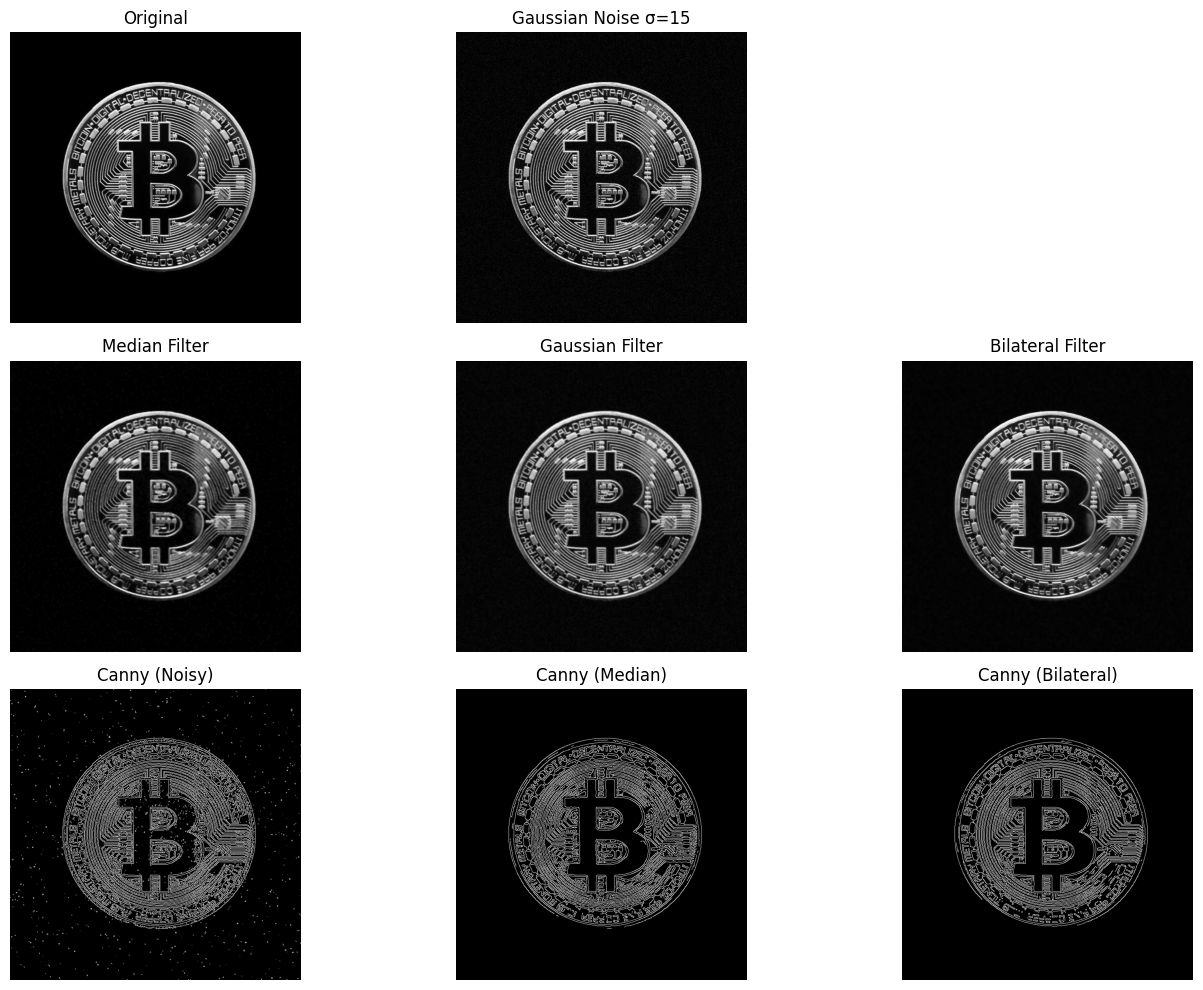

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Load image ---
img = cv2.imread('btc.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# --- Tambahkan noise Gaussian sigma = 15 ---
sigma = 15
gauss_noise = np.random.normal(0, sigma, img_gray.shape).astype(np.float32)
noisy_img = img_gray.astype(np.float32) + gauss_noise
noisy_img = np.clip(noisy_img, 0, 255).astype(np.uint8)

# --- Denoising Filters ---
median_filtered = cv2.medianBlur(noisy_img, 5)
gaussian_filtered = cv2.GaussianBlur(noisy_img, (5,5), 0)
bilateral_filtered = cv2.bilateralFilter(noisy_img, 9, 75, 75)

# --- Canny Edge ---
canny_noisy = cv2.Canny(noisy_img, 100, 150)
canny_median = cv2.Canny(median_filtered, 100, 150)
canny_gaussian = cv2.Canny(gaussian_filtered, 100, 150)
canny_bilateral = cv2.Canny(bilateral_filtered, 100, 150)

# --- Plot Hasil ---
plt.figure(figsize=(14,10))

plt.subplot(3,3,1); plt.imshow(img_gray, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(3,3,2); plt.imshow(noisy_img, cmap='gray'); plt.title("Gaussian Noise σ=15"); plt.axis('off')

plt.subplot(3,3,4); plt.imshow(median_filtered, cmap='gray'); plt.title("Median Filter"); plt.axis('off')
plt.subplot(3,3,5); plt.imshow(gaussian_filtered, cmap='gray'); plt.title("Gaussian Filter"); plt.axis('off')
plt.subplot(3,3,6); plt.imshow(bilateral_filtered, cmap='gray'); plt.title("Bilateral Filter"); plt.axis('off')

plt.subplot(3,3,7); plt.imshow(canny_noisy, cmap='gray'); plt.title("Canny (Noisy)"); plt.axis('off')
plt.subplot(3,3,8); plt.imshow(canny_median, cmap='gray'); plt.title("Canny (Median)"); plt.axis('off')
plt.subplot(3,3,9); plt.imshow(canny_bilateral, cmap='gray'); plt.title("Canny (Bilateral)"); plt.axis('off')

plt.tight_layout()
plt.show()
